# 따릉이 대여량 예측 프로젝트

* date_time : 일별 날짜
* wind_direction: 풍향 (degree)
* sky_condition : 하늘 상태 (하단 설명 참조)
* precipitation_form : 강수 형태 (하단 설명 참조)
* wind_speed : 풍속 (m/s)
* humidity : 습도 (%)
* low_temp : 최저 기온 ( `C)
* high_temp : 최고 기온 ( `C)
* Precipitation_Probability : 강수 확률 (%)
* number_of_rentals : 따릉이 대여량

## 스테이지 1

### 1. 파일을 pandas를 이용해 데이터프레임으로 읽어오기

In [2]:
import pandas as pd

train = pd.read_csv('data/bicycle/train.csv')
test = pd.read_csv('data/bicycle/test.csv')
submission = pd.read_csv('data/bicycle/sample_submission.csv')

### 2. 데이터프레임의 상위 5개 행(row) 데이터 출력하기

각 date_time에 따른 따릉이 대여량을 예측하는 문제임을 알 수 있다.

In [3]:
submission.head()

,date_time,number_of_rentals
0,2021-04-01,0
1,2021-04-02,0
2,2021-04-03,0
3,2021-04-04,0
4,2021-04-05,0


### 3. 데이터프레임(DataFrame)을 CSV 파일로 저장하기

In [4]:
# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/bicycle/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 2

### 1. 데이터프레임(DataFrame)정보 출력하기

train 데이터셋은 총 10개의 열과 273개의 행으로 이루어졌고 결측치가 존재하지 않다는 것을 알 수 있다.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


### 2. 데이터프레임(DataFrame)의 칼럼(column) 이름 확인하기

In [6]:
train.columns

Index(['date_time', 'wind_direction', 'sky_condition', 'precipitation_form',
       'wind_speed', 'humidity', 'low_temp', 'high_temp',
       'Precipitation_Probability', 'number_of_rentals'],
      dtype='object')

### 3. 데이터프레임(DataFrame)의 수치형 변수들에 대한 기술 통계량(descriptive statistics) 출력하기

In [7]:
train.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000


### 4. target의 평균값 추출

In [8]:
mean_target = train['number_of_rentals'].mean()
mean_target

59574.97802197802

### 5. 평균값으로 submission 데이터 채우기 및 CSV 파일로 저장

In [9]:
submission['number_of_rentals'] = mean_target
submission.head()

,date_time,number_of_rentals
0,2021-04-01,59574.978022
1,2021-04-02,59574.978022
2,2021-04-03,59574.978022
3,2021-04-04,59574.978022
4,2021-04-05,59574.978022


In [11]:
# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/bicycle/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 3

### 1. train 데이터프레임에서 data_time 열(column) 제거 및 열 확인

In [12]:
train = train.drop(['date_time'],axis = 1)
print(train.columns)

Index(['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
       'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability',
       'number_of_rentals'],
      dtype='object')


### 2. test 데이터프레임에서 date_time 열(column) 제거 및 열 확인

In [13]:
test = test.drop(['date_time'], axis = 1)
print(test.columns)

Index(['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
       'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability'],
      dtype='object')


### 3. Feature Selection

In [14]:
column_names = [
    'wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
    'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability'
]
X = train[column_names]
y = train['number_of_rentals']

### 4. LinearRegression 모델 정의 및 학습, 예측

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

predict = model.predict(test)
print(predict[:10])

[42227.86240078 37099.81516765 30834.13212531 29586.38928476
 64717.76433044 60730.9690251  70649.35362023 65129.22881864
 71346.13504722 66399.36674565]


### 5. 예측된 따릉이 대여량을 submission 파일에 추가 및 csv 파일 저장

In [16]:
submission['number_of_rentals'] = predict
submission.head()

,date_time,number_of_rentals
0,2021-04-01,42227.862401
1,2021-04-02,37099.815168
2,2021-04-03,30834.132125
3,2021-04-04,29586.389285
4,2021-04-05,64717.764330


In [17]:
# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/bicycle/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 4

### 1. pandas를 이용해 csv 파일 읽어오기

In [76]:
import pandas as pd

train = pd.read_csv('data/bicycle/train.csv')
test = pd.read_csv('data/bicycle/test.csv')
submission = pd.read_csv('data/bicycle/sample_submission.csv')

### 2. EDA (Exploratory Data Analysis) 란

EDA는 탐색적 데이터 분석의 약어이다.(Exploratory Data Analysis)

EDA는 데이터를 탐색하고 이해하기 위한 과정으로, 데이터 세트 구조, 패턴, 상관관계, 이상치 등을 파악하는 것을 목표로 한다.

### 3. 일별 따릉이 대여량(number_of_rentals) 데이터 시각화

아래 그래프를 보면 시간이 흐를수록 따릉이 대여량이 증가한 것을 볼 수 있다.

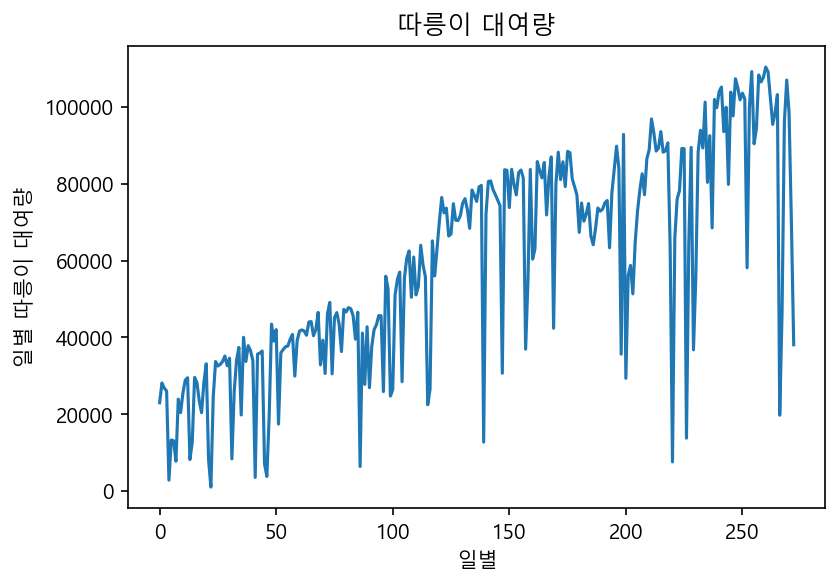

In [77]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [6,4]
# 데이터 준비
x = train['number_of_rentals'].index
y = train['number_of_rentals'].values

# Figure와 Axes 객체 생성
fig, ax = plt.subplots(dpi=150)

# 그래프 제목, x축과 y축 라벨 설정
ax.set_title("따릉이 대여량")
ax.set_xlabel('일별')
ax.set_ylabel('일별 따릉이 대여량')

ax.plot(x, y)
plt.show()

### 4. 일별 따릉이 대여량(number_of_rentals) 이상치 시각화.

위에서 그려본 그래프에 일별 따릉이 대여량 값 중 8000을 이상치를 판단하는 기준이라고 가정하고, 시각화해보자.

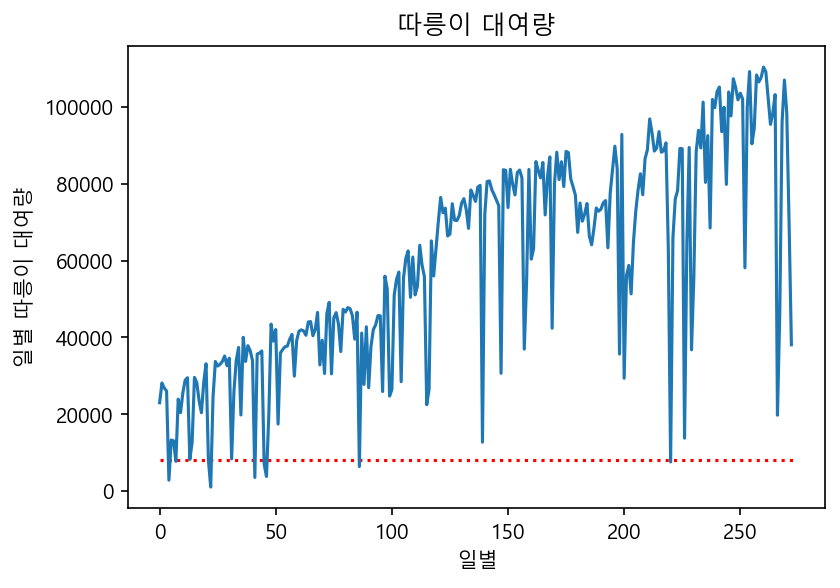

In [78]:
x = train['number_of_rentals'].index
y = train['number_of_rentals'].values

# Figure와 Axes 객체 생성
fig, ax = plt.subplots(dpi=150)

# 그래프 제목, x축과 y축 라벨 설정
ax.set_title("따릉이 대여량")
ax.set_xlabel('일별')
ax.set_ylabel('일별 따릉이 대여량')

ax.hlines(y=8000, xmin=0, xmax=len(x), colors='red', linestyles='dotted')

# 데이터 시각화
ax.plot(x, y)

# 그래프 표시
plt.show()

### 5. train 데이터프레임(DataFrame)에서 이상치 값 상위 5행(row) 데이터 추출

대여량이 8000을 넘지 않는 이상치 를 확인해 보자.

In [79]:
train[train['number_of_rentals']<=8000].head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
7,2018-04-08,200.939,2.405,0.054,3.865,53.243,4.312,14.211,15.676,7758
22,2018-04-23,79.554,4.000,1.000,4.127,81.182,9.250,15.158,75.608,1037
41,2018-05-12,154.541,3.946,0.588,2.590,75.405,13.938,21.632,54.392,3551
45,2018-05-16,191.108,4.000,0.797,2.815,85.405,19.688,23.105,66.554,7072


### 6. train 데이터프레임(DataFrame)에서 이상치 평균값 추출

In [80]:
_train = train.drop('date_time', axis=1)
_train[_train['number_of_rentals']<=8000].mean()

wind_direction                156.688250
sky_condition                   3.775250
precipitation_form              0.735625
wind_speed                      3.344000
humidity                       76.786125
low_temp                       13.023500
high_temp                      19.375000
Precipitation_Probability      62.736500
number_of_rentals            5005.500000
dtype: float64

### 7. train 데이터프레임(Dataframe)에서 대여량 이상치에 따른 피처(feature)별 시각화

아래 결과를 통해 

강수 형태(precipitation_form)와 강수 확률(Precipitation_Probability) 피처에서 8000 이상과 이하의 값 사이에 큰 차이가 있는 것을 발견할 수 있다.

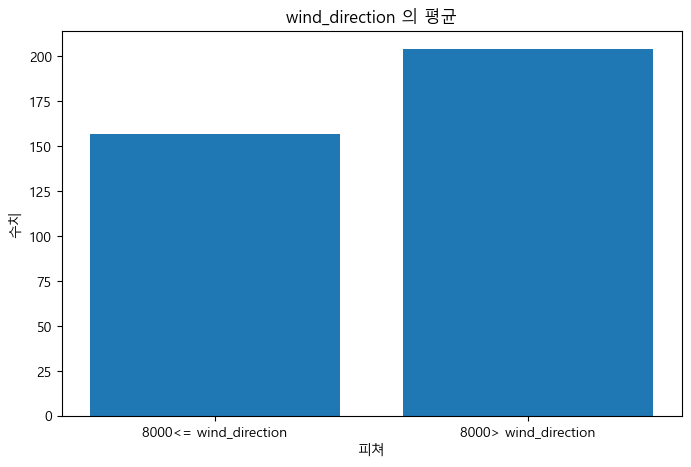

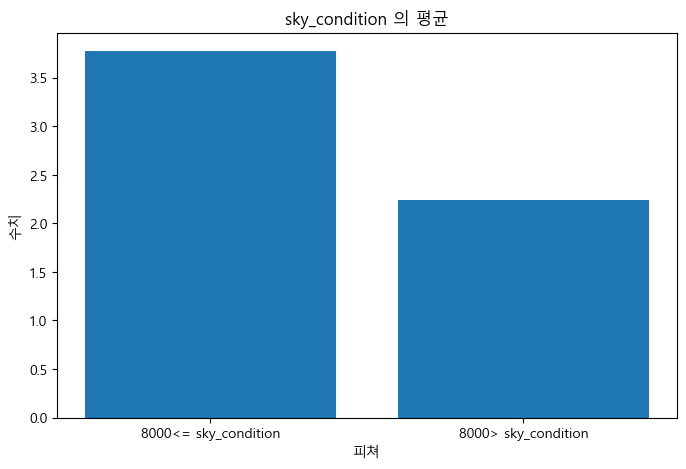

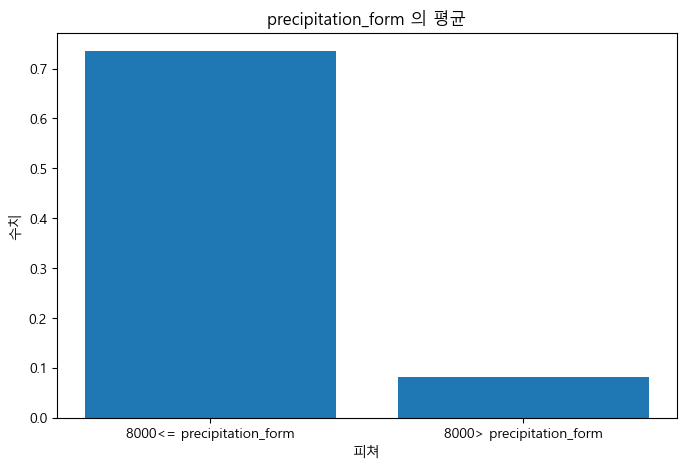

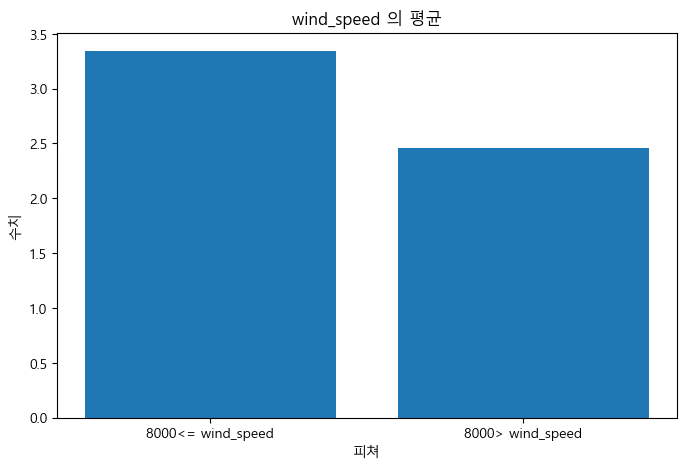

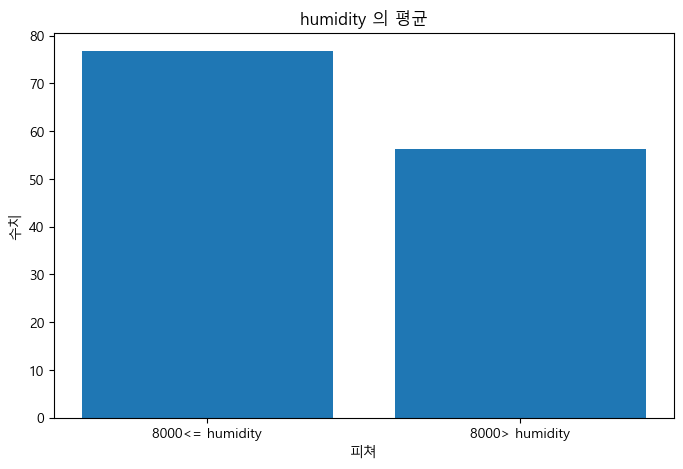

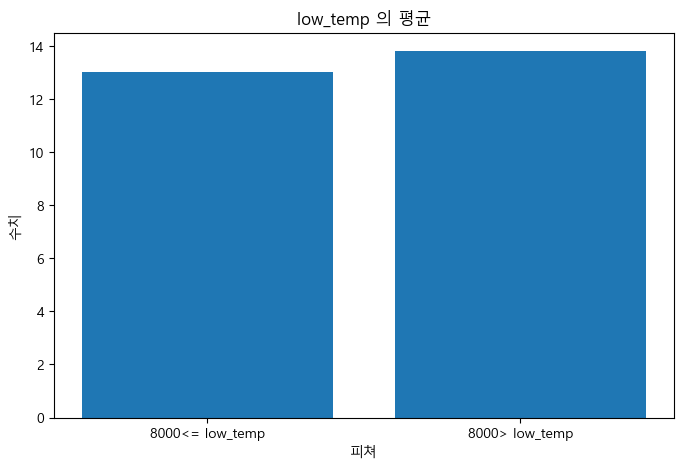

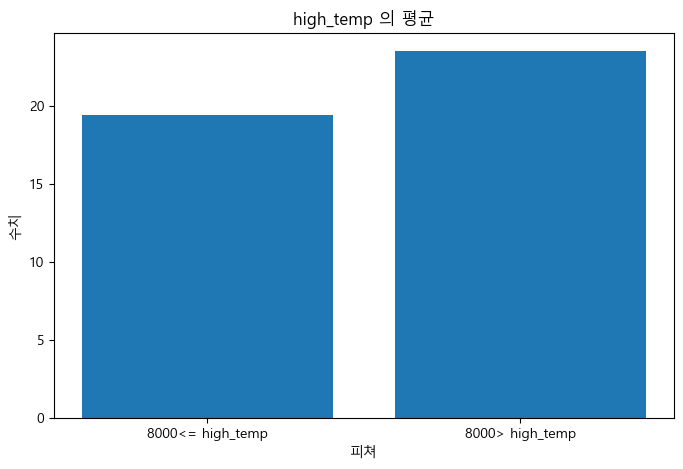

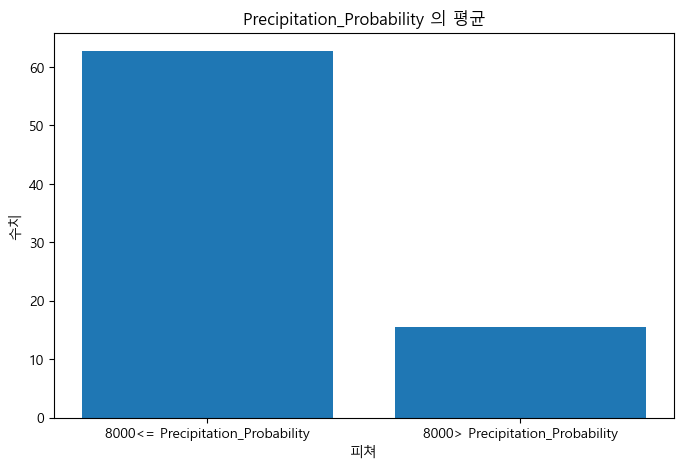

In [81]:
low = _train[_train['number_of_rentals']<=8000].mean()
high = _train[_train['number_of_rentals']>8000].mean()

def compare(idx):
    x = ['8000<= '+low.index[idx], '8000> '+low.index[idx]]
    y = [low.values[idx], high.values[idx]]

    plt.figure(figsize = (8,5))
    plt.title(low.index[idx]+" 의 평균")
    plt.xlabel('피쳐')
    plt.ylabel('수치')
    plt.bar(x, y)
    plt.show()
    
for i in range(8):
    compare(i)

### 8. 일별 강수 형태(precipitation_form) 변화를 나타내는 선형 그래프

시간의 흐름에 따른 강수 형태를 봤을 때 뚜렷한 패턴은 보이지 않지만, 값이 0인 데이터 즉, 비가 오지 않은 날이 많아 보인다.

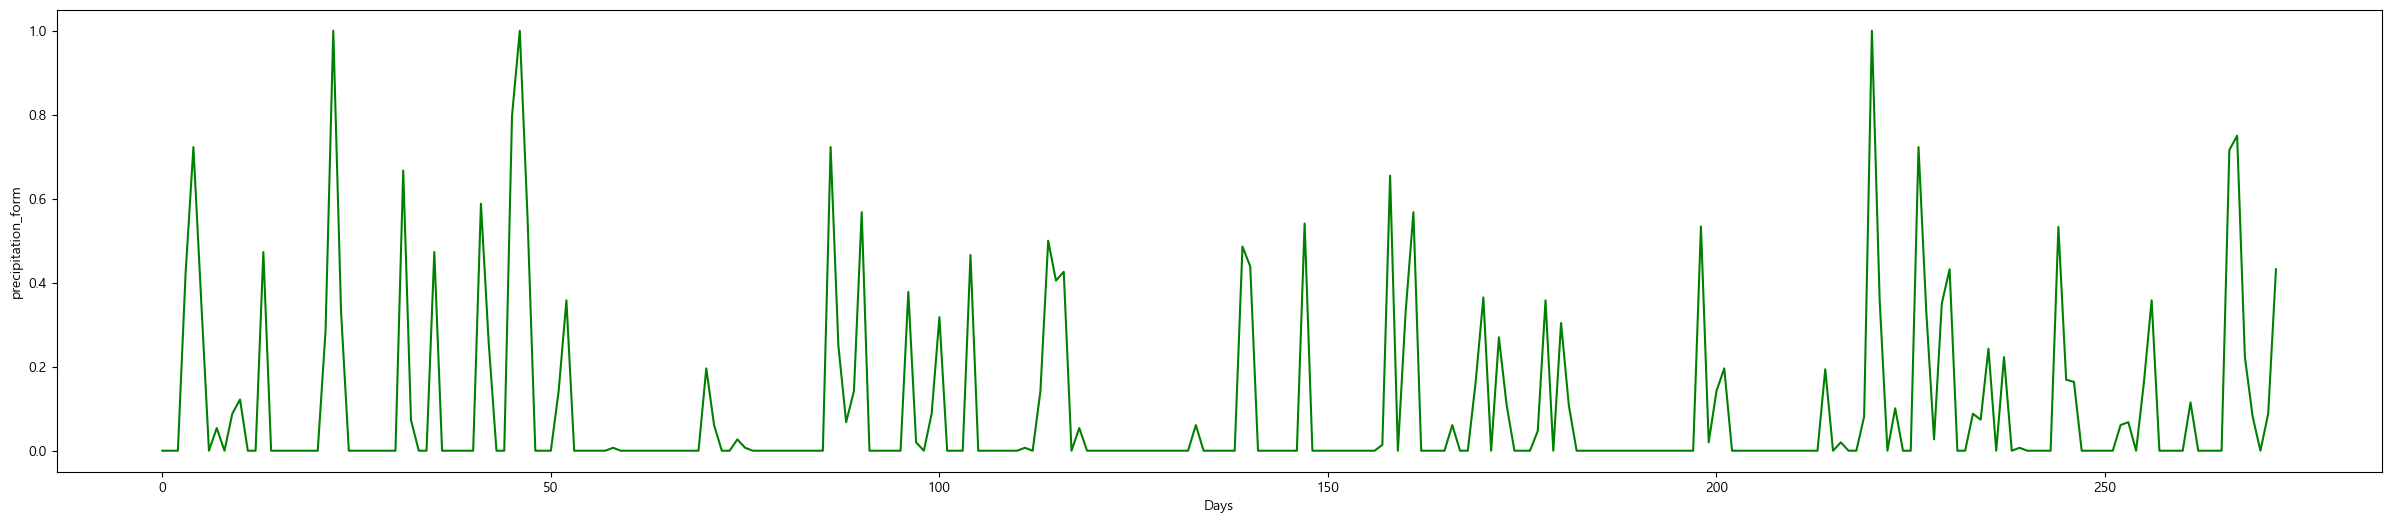

In [82]:
plt.figure(figsize=(30,6))    
   
a = plt.plot(train['precipitation_form'], color='g')    
 
plt.ylabel('precipitation_form')    
plt.xlabel('Days')     
plt.show()   

### 9. 연도별 따릉이 대여량(number_of_rentals) 평균 시각화

연도별로 따릉이 대여량이 꾸준히 증가하는 것을 확인할 수 있다.

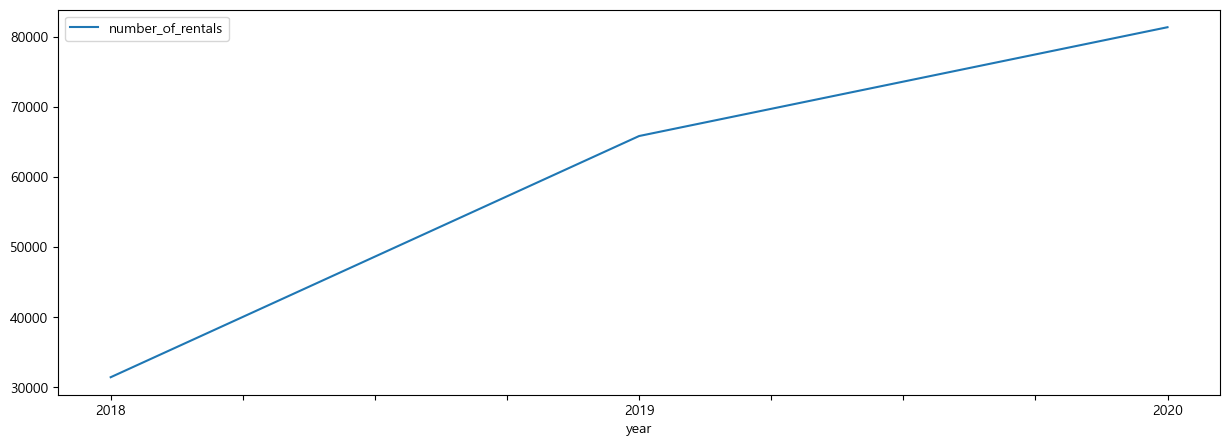

In [83]:
train['year'] = train['date_time'].apply(lambda x: x.split('-')[0])

_train = train.copy().drop('date_time', axis=1)
_train.groupby('year').mean()[['number_of_rentals']].plot(figsize=(15,5))
plt.show()

### 10. 월별 따릉이 대여량(number_of_rentals) 평균 시각화

4월<5월<6월과 같이 따릉이 대여량이 점차적으로 증가한 것을 확인할 수 있다.

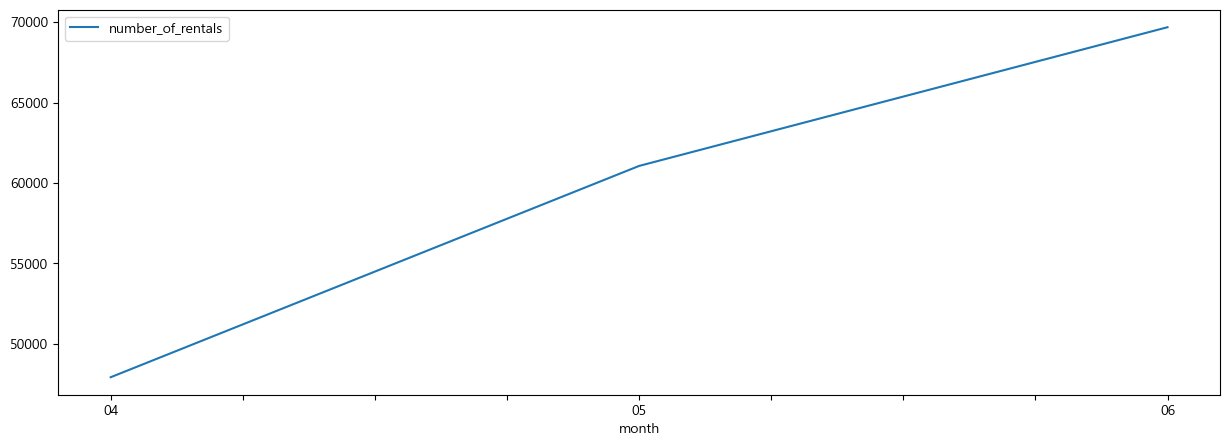

In [84]:
train['month'] = train['date_time'].apply(lambda x : x.split('-')[1])    

_train = train.copy().drop(['date_time', 'year'], axis=1)
_train.groupby('month').mean()[['number_of_rentals']].plot(figsize=(15,5))    
plt.show()

### 11. 일별 따릉이 대여량(number_of_rentals) 평균 시각화

뚜렷한 증감세는 없다가, 월말에 급상승한 것을 볼 수 있다.

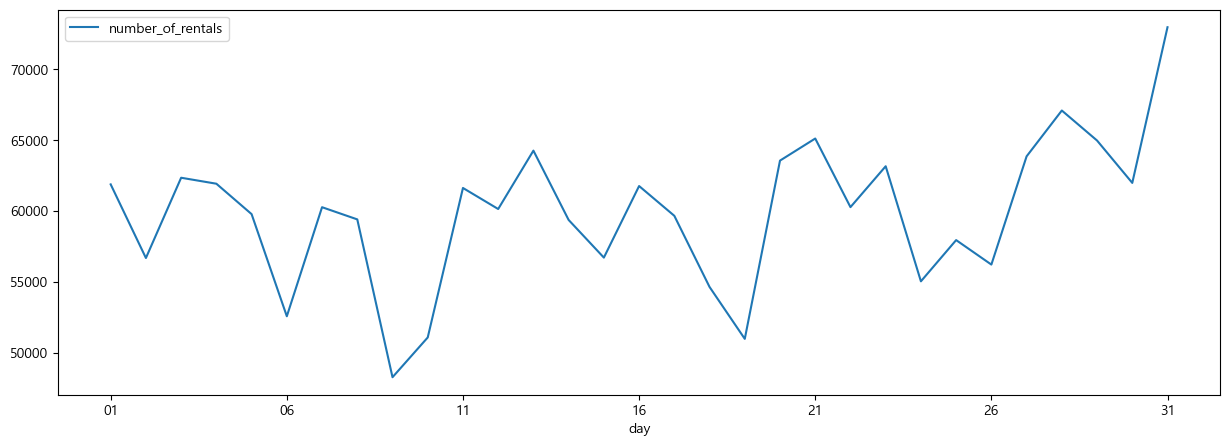

In [85]:
train['day'] = train['date_time'].apply(lambda x : x.split('-')[2])    

_train = train.copy().drop(['date_time', 'year', 'month'], axis=1)
_train.groupby('day').mean()[['number_of_rentals']].plot(figsize=(15,5))    
plt.show()

### 12. 파생변수 생성 : 연도(year)

그럼 EDA를 통해서 얻은 인사이트를 가지고 결론을 도출해 보자.

강수 변수 - 따릉이 대여량 큰 차이
정확한 분석을 위하여 date_time 변수 EDA

date_time 변수 - 연도, 월별
뚜렷한 증가 추세

date_time 변수 -일별
뚜렷한 증감세가 없다가, 월말에 급상승

아래 코드는 위에 year 피처를 생성했지만 문자열 타입이기에 정수타입으로 변환

In [86]:
train['year'] = train['date_time'].apply(lambda x : int(x.split('-')[0]))

train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,04,01
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,04,02
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,04,03
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,04,04
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,04,05


### 13. 파생변수 생성 : 월(month), 일(day)

In [87]:
train['month'] = train['date_time'].apply(lambda x : int(x.split('-')[1]))    
train['day'] = train['date_time'].apply(lambda x : int(x.split('-')[2]))    

train.head()  

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


### 14. date_time 변수 제거

In [88]:
train = train.drop(['date_time'],axis = 1)
train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


### 15. test 데이터 전처리

test 데이터에도 항상 train에 적용한 전처리 과정을 동일하게 적용한다.

In [89]:
test['year'] = test['date_time'].apply(lambda x : int(x.split('-')[0]))    
test['month'] = test['date_time'].apply(lambda x : int(x.split('-')[1]))    
test['day'] = test['date_time'].apply(lambda x : int(x.split('-')[2]))    
 
test = test.drop(['date_time'],axis = 1)    

test.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5


### 16. Feature Selection

독립변수 X와 종속변수(타깃변수) y를 설정한다.

In [90]:
y = train['number_of_rentals']

X = train[['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
       'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'year', 'month', 'day']]

### 17. LinearRegression 모델 정의, 학습 및 예측

In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

predict = model.predict(test)      
print(predict[:10])

[ 95753.39158273  93038.72467582  72440.29398847  73765.53858463
 104582.08036839 104619.85357678 106392.87120533 103351.66569973
 107326.44898935 104731.57159771]


### 18. 예측된 따릉이 대여량을 submission 파일에 추가 및 csv 파일 저장

In [92]:
submission['number_of_rentals'] = predict
submission.head()

,date_time,number_of_rentals
0,2021-04-01,95753.391583
1,2021-04-02,93038.724676
2,2021-04-03,72440.293988
3,2021-04-04,73765.538585
4,2021-04-05,104582.080368


In [93]:
# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/bicycle/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 5

### 1. pandas를 이용해 csv 파일 읽어오기

In [2]:
import pandas as pd

train = pd.read_csv('data/bicycle/train.csv')
test = pd.read_csv('data/bicycle/test.csv')
submission = pd.read_csv('data/bicycle/sample_submission.csv')

In [3]:
train['year'] = train['date_time'].apply(lambda x : int(x.split('-')[0]))
train['month'] = train['date_time'].apply(lambda x : int(x.split('-')[1]))    
train['day'] = train['date_time'].apply(lambda x : int(x.split('-')[2]))    

### 2. 데이터프레임 정보 확인하기

탐색적 자료 분석(EDA)을 통해 얻은 인사이트를 바탕으로 전처리한 변수,
연, 월, 일 이 담겨 있는 데이터 셋을 불러온다.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
 10  year                       273 non-null    int64  
 11  month                      273 non-null    int64  
 12  day                        273 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 2

### 3. 요일 정보 추가

In [5]:
week_day = pd.to_datetime(train['date_time']).dt.day_name()
train['week_day'] = week_day

### 4. 요일별 따릉이 대여량 비교

bar(막대 그래프)를 이용해 요일별 따릉이 대여량을 살펴보자.

요일별로 따릉이 사용량은 큰 차이가 없어 보인다. 아마 연도별 차이량을 무시하고 통째로 봐서 그런 듯하다.

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:

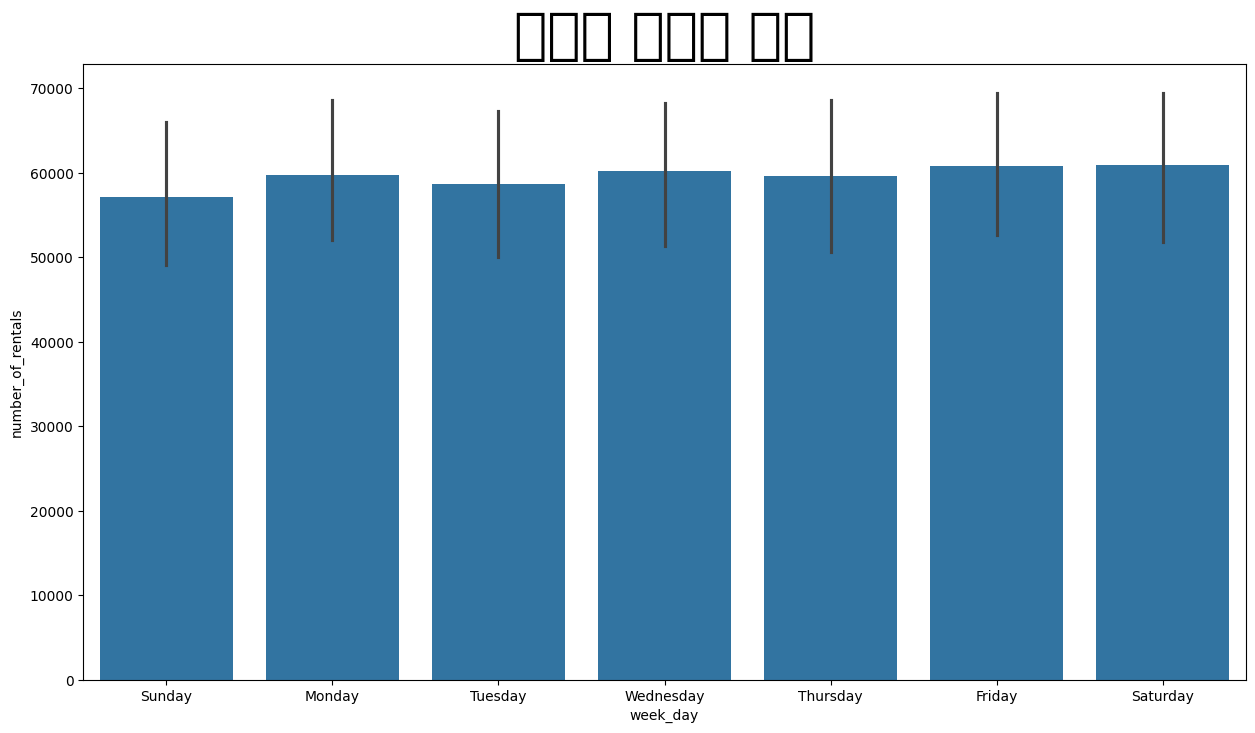

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

sns.barplot(x=train['week_day'], y=train['number_of_rentals'])
plt.title('요일별 대여량 비교', fontsize=40)
plt.show()

### 5. 요일별 + 연도별 따릉이 대여량 비교

그럼 요일별, 연도별 대여량을 시각화해보자.

연도별로 증가하는 것 말고는 찾지 못했다.

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py

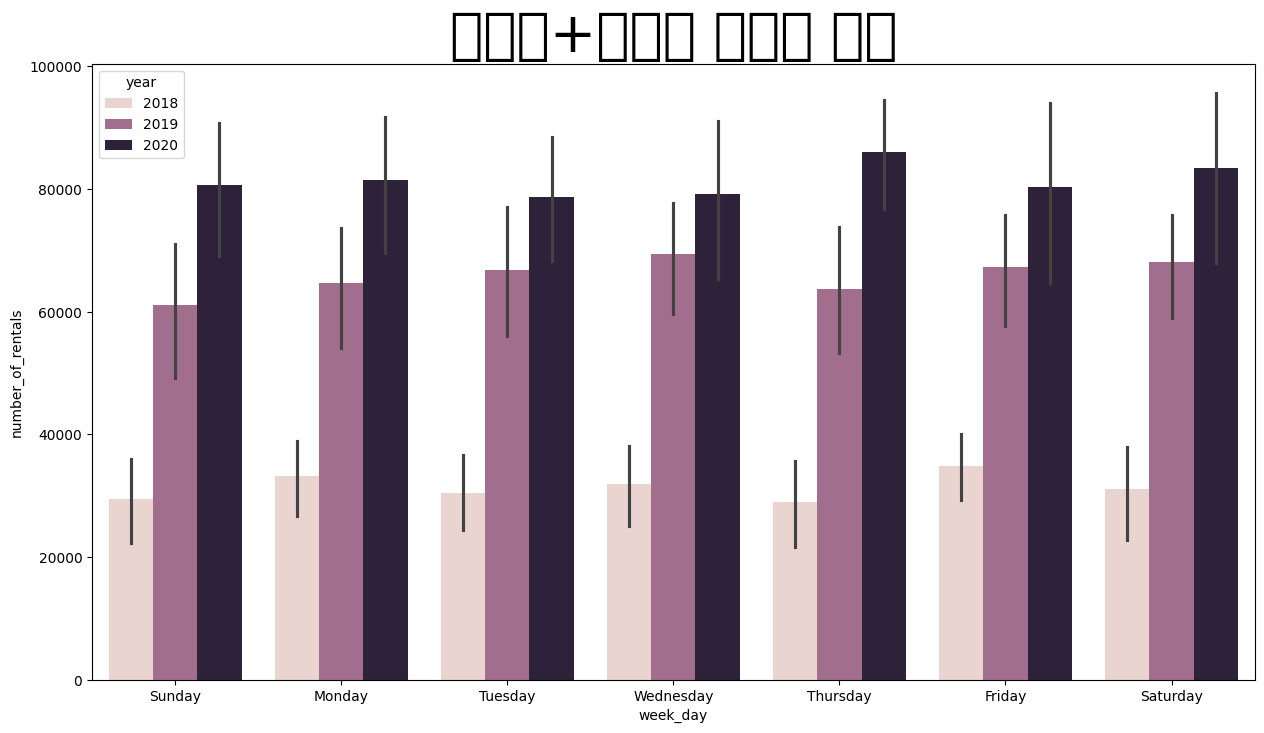

In [7]:
plt.figure(figsize=(15,8))

sns.barplot(x=train['week_day'], y=train['number_of_rentals'], hue=train['year'])
plt.title('요일별+연도별 대여량 비교', fontsize=40)
plt.show()

### 6. 더위 점수(hot_score)

그렇다면, 날씨가 덥고 습한 날에 사람들이 외출을 많이 할까? 

그리고 이런 날씨가 따릉이 대여량에 영향을 미칠까?

이를 위해 '더위 점수'라는 파생 변수를 한 번 만들어 보자.

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:1

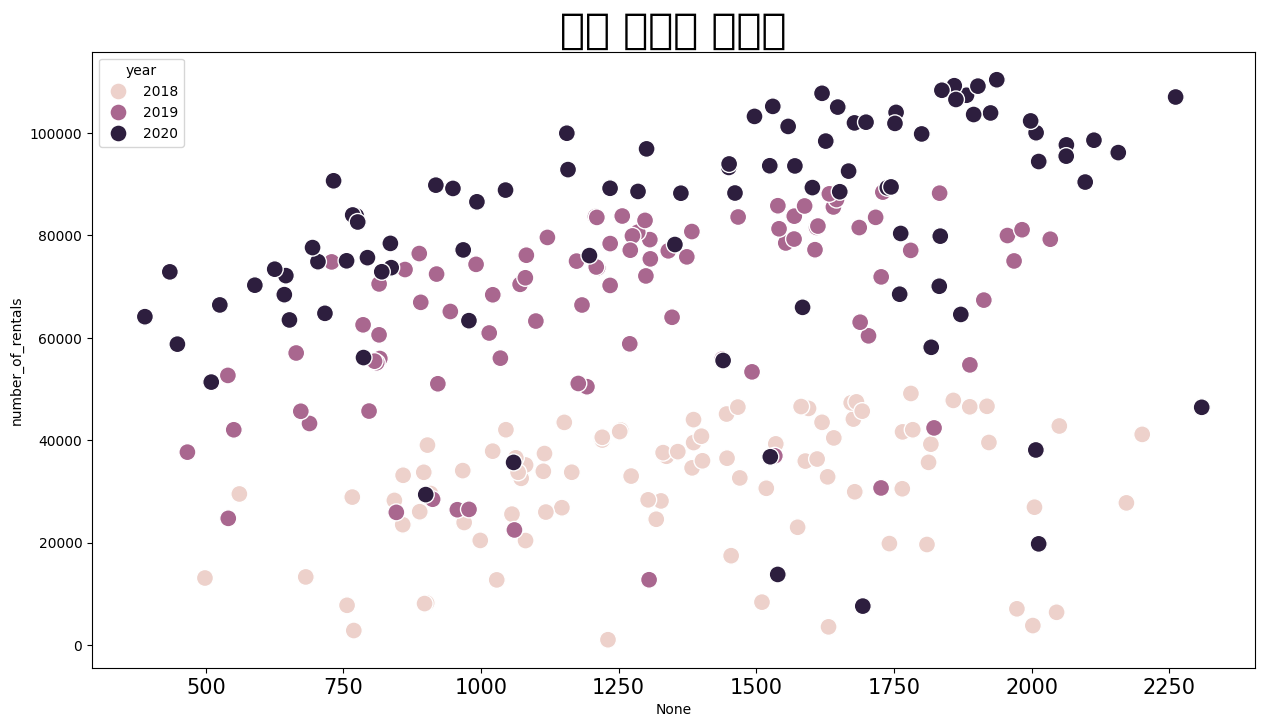

In [8]:
hot_score = train['high_temp'] * train['humidity']

plt.figure(figsize=(15,8))
sns.scatterplot(x=hot_score, y=train['number_of_rentals'], hue=train['year'], s=150)
plt.xticks(fontsize=15)
plt.title('더위 점수와 대여량', fontsize=30)
plt.show()

위의 그래프를 보면 더위 점수가 따릉이 대여량에 영향을 주는 것으로 판단되며, 따릉이 대여량과 더위점수는 양의 상관관계임을 알 수 있다.

### 7. 추위 점수(cold_score)

그럼 반대로, 날씨가 춥고 풍속이 강한 날은 어떨까?

이런 날씨가 따릉이 대여량에 영향을 미칠까?

이를 알아보기 위하여 추위 점수라는 파생변수를 한번 만들어 보자.

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:17

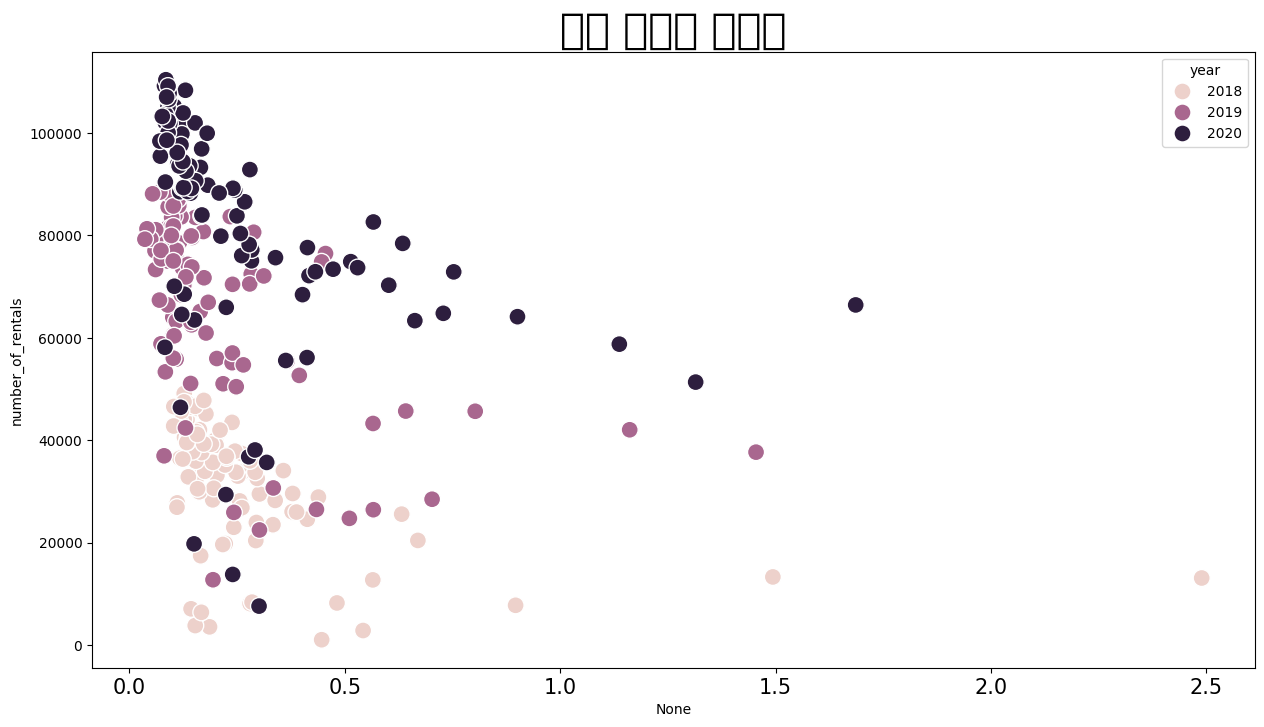

In [9]:
cold_score = train['wind_speed'] / train['low_temp']

plt.figure(figsize=(15,8))
sns.scatterplot(x = cold_score, y=train['number_of_rentals'], hue=train['year'], s = 150 )
plt.xticks(fontsize=15)
plt.title('추위 점수와 대여량', fontsize = 30)
plt.show()

위의 그래프를 통해 추위 점수는 따릉이 대여량과 음의 상관 관계를 가짐을 알 수 있다.

### 8. 연도별 대여량

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.p

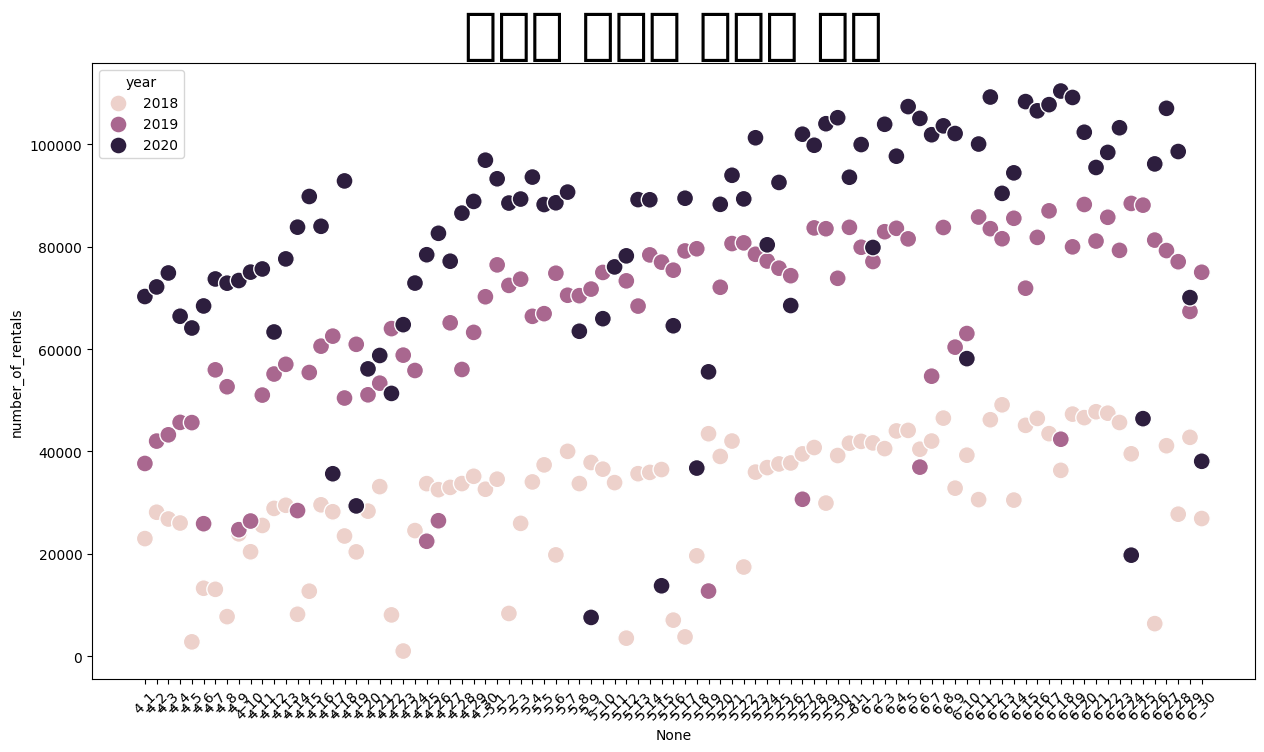

In [10]:
month_day = train['month'].astype(str) + '_' + train['day'].astype(str)

plt.figure(figsize=(15,8))

sns.scatterplot(x=month_day, y=train['number_of_rentals'], hue=train['year'], s=150)
plt.xticks(rotation=45)
plt.title('연도별 따릉이 대여량 비교', fontsize=40)
plt.show()

연도별로 따릉이 대여량이 꾸준히 증가하는 것을 확인할 수 있다.

따릉이는 서비스를 이용할 수 없는, '휴무일'이 없는 무인 공공 대여 서비스이기 때문에 중간중간에 아주 낮은 점들은 비가 많이 오는 등의 날씨가 궃은 날이라고 판단할 수 있다.

### 9. feature와 target의 상관관계

마지막 EDA로 feature와 target의 상관관계를 알아보자.

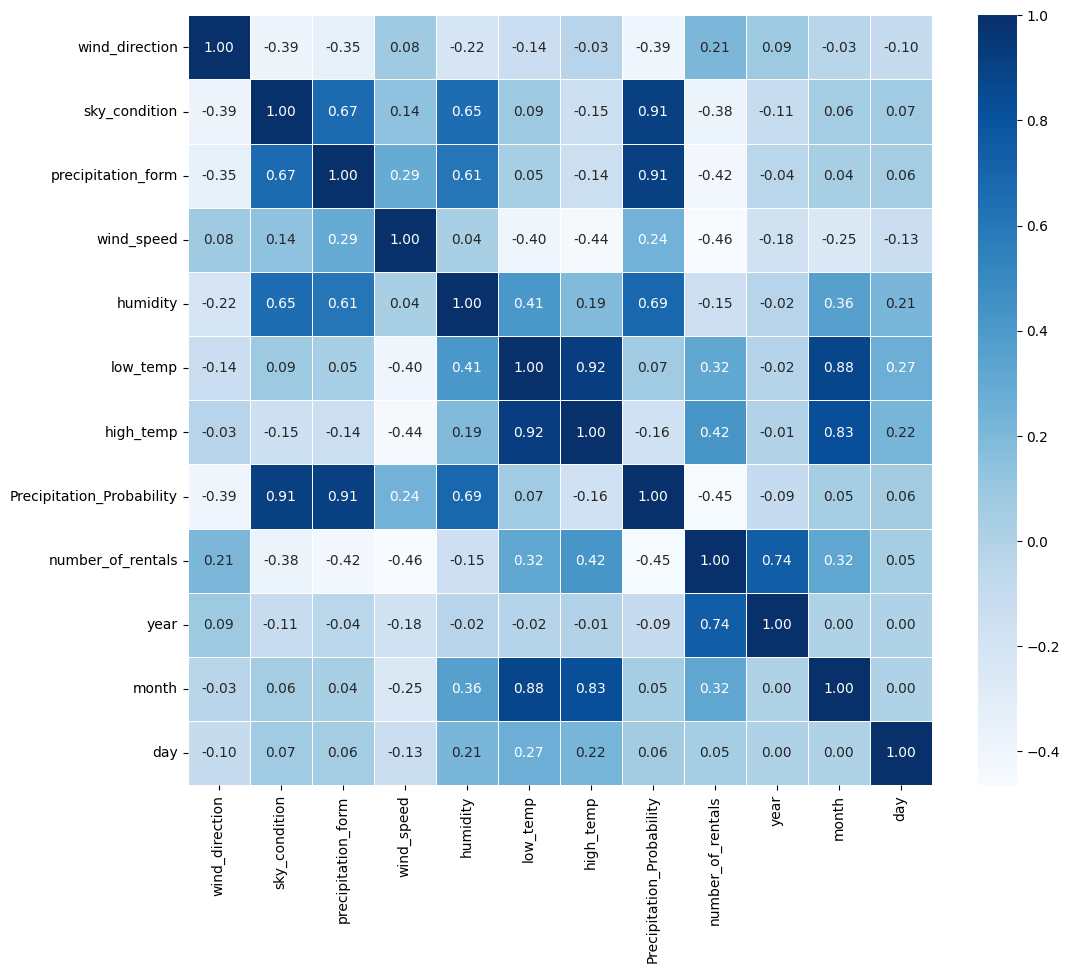

In [11]:
_train = train.copy().drop(['date_time', 'week_day'], axis=1)

plt.figure(figsize=(12,10))
sns.heatmap(data = _train.corr(method='pearson'), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

위의 결과를 통해, 온도와 따릉이 대여량은 양의 상관관계를 가지고 있다. 반면에 강수량과 미세먼지는 따릉이 대여량과 음의 상관관계를 가지고 있다.

이를 종합하면, 따릉이 대여량은 온도가 높을수록 증가하며, 강수량과 미세먼지는 낮을수록 증가하는 경향을 보인다.

### 10. 더위 점수 파생변수 생성

In [12]:
train['hot_score']  = train['high_temp'] * train['humidity']
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day,hot_score
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday,1575.000000
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday,1326.827000
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday,1146.846764
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday,888.628432
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday,768.903064


### 11. 추위 점수 파생변수 생성

In [13]:
train['cold_score'] = train['wind_speed'] / train['low_temp']
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day,hot_score,cold_score
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday,1575.000000,0.242063
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday,1326.827000,0.255854
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday,1146.846764,0.260861
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday,888.628432,0.377526
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday,768.903064,0.542298


### 12. 연도 별 인플레이션 반영(2020년도 기준)

이번엔 2018, 2019, 2020년도 데이터 값만 활용하는 게 아니라,
연도별 따릉이 대여량 증가율 즉, Year 인플레이션을 반영해 주는 변수를 생성해 보는 것은 어떨까?

그 이유는, 앞서 EDA를 한 결과에서 따릉이 대여량이 매년 증가했기 때문이다.
그렇다면 단순히 있는 데이터를 변수로 설정하는 게 아니라, 연도별 증감 비율을 반영해 주는 게 더욱 좋을 것이다.

In [14]:
x1 = sum(train[train['year']==2018]['number_of_rentals'])
x2 = sum(train[train['year']==2019]['number_of_rentals'])
x3 = sum(train[train['year']==2020]['number_of_rentals'])

print(x3/x1) 
print(x3/x2)

2.5898531680403214
1.2358394161314505


### 13.연도별 인플레이션을 반영한 따릉이 대여량 조정 계산(2020년도 기준)

In [15]:
y1 = train[train['year'] == 2018]['number_of_rentals'] * round(x3/x1, 2)
y2 = train[train['year'] == 2019]['number_of_rentals'] * round(x3/x2, 2)
y3 = train[train['year'] == 2020]['number_of_rentals']

temp = train[['year', 'number_of_rentals']]
temp = temp.copy()
temp['inflation_rentals'] = pd.concat([y1, y2, y3], axis=0).to_frame()
temp[:5]

,year,number_of_rentals,inflation_rentals
0,2018,22994,59554.46
1,2018,28139,72880.01
2,2018,26817,69456.03
3,2018,26034,67428.06
4,2018,2833,7337.47


### 14. feature 제거

In [16]:
train = train.drop(['week_day'],axis = 1)
train = train.drop(['day'],axis = 1)
train = train.drop(['date_time'],axis = 1)

train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,hot_score,cold_score
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1575.000000,0.242063
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,1326.827000,0.255854
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,1146.846764,0.260861
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,888.628432,0.377526
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,768.903064,0.542298


### 15. test 데이터 전처리

test 데이터도 똑같이 전처리한다.

In [17]:
test['year'] = test['date_time'].apply(lambda x : int(x.split('-')[0]))
test['month'] = test['date_time'].apply(lambda x : int(x.split('-')[1]))    
test['hot_score'] = test['high_temp'] * test['humidity']

test['cold_score'] = test['wind_speed'] / test['low_temp']

test = test.drop(['date_time'],axis = 1)

test.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,hot_score,cold_score
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,585.558111,0.245763
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,881.923000,0.221833
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,1264.558944,0.243944
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,1099.185984,0.599520
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,900.120384,0.217028


### 16. 독립변수 및 종속변수 설정

In [18]:
features = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed','humidity', 'low_temp', 'high_temp', 'Precipitation_Probability','year', 'month', 'hot_score', 'cold_score']

X = train[features]
test = test[features]

y = train['number_of_rentals']

y.head()

0    22994
1    28139
2    26817
3    26034
4     2833
Name: number_of_rentals, dtype: int64

### 17. LinearRegression 모델 정의/학습/예측

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
predict = model.predict(test)  
    
print(predict[:10])

[ 96175.64422127  93845.20983331  77136.79275706  76208.34011317
 104855.47606268 106151.69058622 108028.43207672 104456.69087511
 107049.61077241 105968.83659898]


### 18. submission 파일에 예측값 할당

In [20]:
submission['number_of_rentals'] = predict
submission.head()

,date_time,number_of_rentals
0,2021-04-01,96175.644221
1,2021-04-02,93845.209833
2,2021-04-03,77136.792757
3,2021-04-04,76208.340113
4,2021-04-05,104855.476063


### 19. 연도 별 인플레이션을 반영한 따릉이 대여량 조정 계산(2021년도 기준)

해가 지날수록 따릉이 대여량이 꾸준히 증가하는 것을 반영하기 위해 inflation_rentals라는 변수명으로 2021년도 기준의 Year Inflation을 생성해보자.

In [21]:
x1 = sum(train[train['year']==2018]['number_of_rentals'])
x2 = sum(train[train['year']==2019]['number_of_rentals'])
x3 = sum(train[train['year']==2020]['number_of_rentals'])
x4 = sum(submission['number_of_rentals'])

def rental_rate_change(df):    

    y1 = df[df['year'] == 2018]['number_of_rentals'] * round(x4/x1, 2)       
    y2 = df[df['year'] == 2019]['number_of_rentals'] * round(x4/x2, 2)       
    y3 = df[df['year'] == 2020]['number_of_rentals'] * round(x4/x3, 2)      
    new = pd.concat([y1, y2, y3], axis=0).to_frame()          
    df['inflation_rentals'] = new['number_of_rentals']      

rental_rate_change(train)

### 20. 파생변수 생성 후 모델 학습

In [22]:
X = train.drop(['number_of_rentals', 'inflation_rentals'], axis = 1)
y = train['inflation_rentals']

model = LinearRegression()
model.fit(X,y)
predict = model.predict(test)

### 21. submission 파일에 target 값 채우기 및 csv 파일 저장

In [23]:
submission['number_of_rentals'] = predict

submission.head()

,date_time,number_of_rentals
0,2021-04-01,95162.442083
1,2021-04-02,88835.579092
2,2021-04-03,30243.656847
3,2021-04-04,42526.816516
4,2021-04-05,94363.679427


In [24]:
# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/bicycle/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 6

### 1. 데이터프레임 정보 확인하기

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   wind_direction             273 non-null    float64
 1   sky_condition              273 non-null    float64
 2   precipitation_form         273 non-null    float64
 3   wind_speed                 273 non-null    float64
 4   humidity                   273 non-null    float64
 5   low_temp                   273 non-null    float64
 6   high_temp                  273 non-null    float64
 7   Precipitation_Probability  273 non-null    float64
 8   number_of_rentals          273 non-null    int64  
 9   year                       273 non-null    int64  
 10  month                      273 non-null    int64  
 11  hot_score                  273 non-null    float64
 12  cold_score                 273 non-null    float64
 13  inflation_rentals          273 non-null    float64

### 2. Feature Selection

In [28]:
X = train.drop(['number_of_rentals', 'inflation_rentals'], axis = 1)
y = train['inflation_rentals']

### 3. DecisionTreeRegressor 모델 정의

In [29]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

### 4. DecisionTreeRegressor 모델 학습 / 예측

In [30]:
model.fit(X,y)
predict = model.predict(test)      
print(predict[:10])

[ 82730.16  81711.18  36403.02  45076.83  90627.66  81105.75  86638.23
 100306.71  90627.66 101661.24]


### 5. DecisionTreeRegressor 모델 예측값 시각화

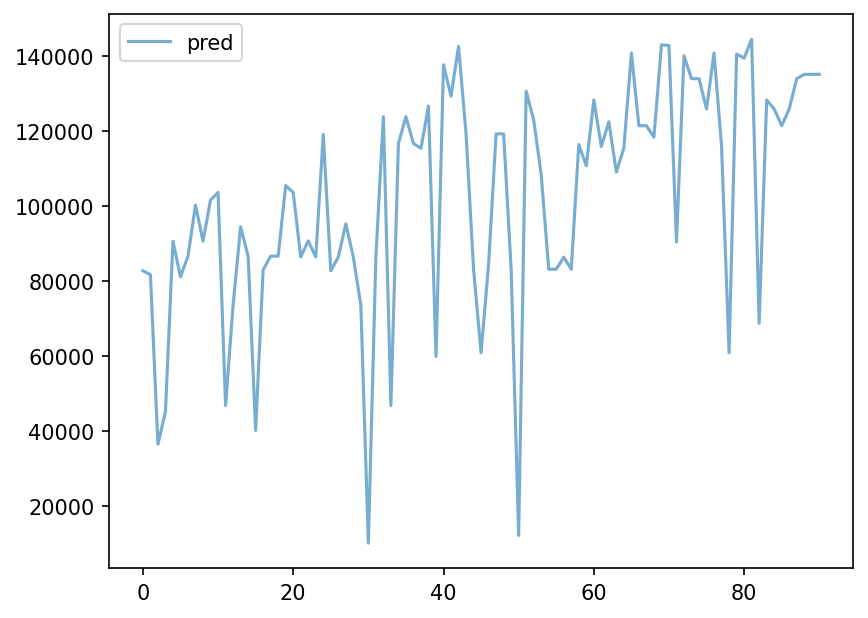

In [31]:
plt.figure(dpi=150)
plt.plot(predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

### 6. RandomForest 모델 정의

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

### 7. RandomForest 모델 학습 / 예측

In [33]:
model.fit(X,y)
RF_predict = model.predict(test)
 
print(RF_predict[:10])

[102513.5278 102120.7858  40191.6425  47650.0046  99772.5855  95586.2071
  91788.7722  96134.6084 100402.598  101391.1095]


### 8. RandomForestRegressor 모델 예측값 시각화

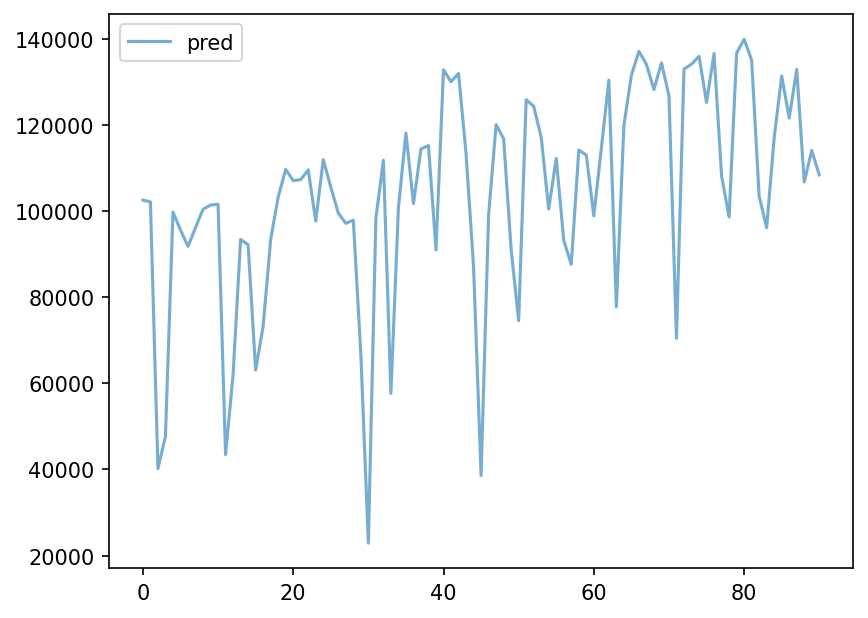

In [34]:
plt.figure(dpi=150)
plt.plot(RF_predict, alpha=0.6, label='pred')
plt.legend()
plt.show()

### 9. RandomForest 하이퍼 파라미터 튜닝

In [35]:
model = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

model.fit(X,y)

predict = model.predict(test)

### 10. submission 파일에 예측값 할당 및 csv 파일 저장

In [36]:
submission['number_of_rentals'] = predict

In [38]:
# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/bicycle/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')